# Зареждаме необходимите библиотеки

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Зареждаме дейтасета от обединените данни 

In [2]:
df_patients = df_patients = pd.read_csv('df_combined.csv')

In [3]:
df_patients

,Unnamed: 0,PATIEND_ID,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,0,0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,1,1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,2,2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,3,3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,4,4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,58,58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,59,59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,60,60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [4]:
#Изтриваме ненужната колона Unnamed: 0
del df_patients['Unnamed: 0']



In [5]:
del df_patients['PATIEND_ID']

In [6]:
df_patients

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [7]:
stage_map = {'A':1,'B':2,'C':3,'D':4}

In [8]:
#Присвояваме стойност на стадиите
df_patients['Dukes Stage'] = df_patients['Dukes Stage'].map(stage_map)

In [9]:
gender_map = {'Male':0, 'Female':1}

In [10]:
#Присвояваме стойност на половете
df_patients['Gender'] = df_patients['Gender'].map(gender_map)

In [11]:
location_map = {'Left':0, 'Right':1,'Rectum':2,'Colon':3}

In [12]:
#Присвояваме стойност на разположението на рака
df_patients['Location'] = df_patients['Location'].map(location_map)

In [13]:
df_patients

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,1,0,0,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,2,0,0,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,3,1,0,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,4,1,0,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,3,0,0,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,3,0,0,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,4,0,1,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,3,0,0,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,1,0,2,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [14]:
#Нека да разгледаме някои особености за нашия дейтасет

([<matplotlib.patches.Wedge at 0x28a785fefb0>,
 [Text(-0.8346338830256941, 0.7165097914930766, 'Male'),
  Text(0.8346338159412022, -0.7165098696371375, 'Female')],
 [Text(-0.45525484528674215, 0.3908235226325872, '77.42%'),
  Text(0.4552548086952012, -0.3908235652566204, '22.58%')])

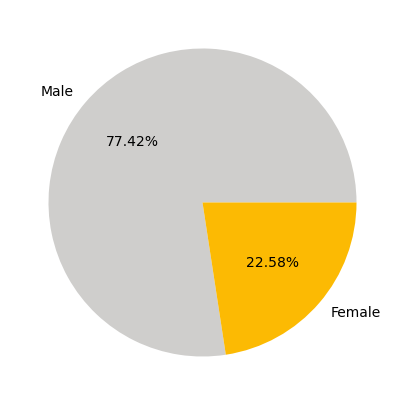

In [15]:
plt.figure(figsize=(5, 5))
plt.pie(
    df_patients["Gender"].value_counts(),
    autopct = "%.2f%%",
    labels = ["Male", "Female"],
    colors = ["#cfcecc", "#fcba03"]
)

([<matplotlib.patches.Wedge at 0x28a78d82aa0>,
 [Text(-0.3292995240273152, 1.04955315419248, 'Remission'),
  Text(0.32929962229357157, -1.049553123361229, 'Recurrence')],
 [Text(-0.17961792219671738, 0.5724835386504437, '59.68%'),
  Text(0.17961797579649355, -0.5724835218333976, '40.32%')])

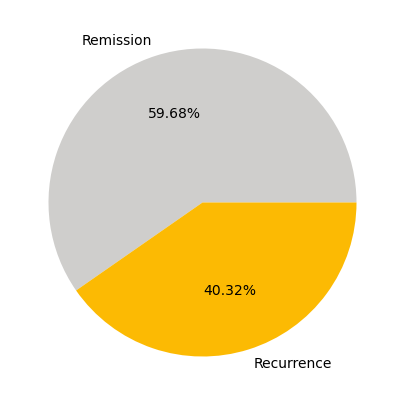

In [16]:
plt.figure(figsize=(5, 5))
plt.pie(
    df_patients["DFS event"].value_counts(),
    autopct = "%.2f%%",
    labels = ["Remission", "Recurrence"],
    colors = ["#cfcecc", "#fcba03"]
)

([<matplotlib.patches.Wedge at 0x28a78dddb10>,
 [Text(0.4844335995233389, 0.9875849774337707, 'Left'),
  Text(-1.0943562664864532, -0.11128504841995318, 'Right'),
  Text(0.484433414594573, -0.9875850681456473, 'Rectum'),
  Text(1.0943562352286353, -0.11128535580303443, 'Colon')],
 [Text(0.2642365088309121, 0.5386827149638749, '35.48%'),
  Text(-0.5969215999017017, -0.06070093550179264, '32.26%'),
  Text(0.26423640796067616, -0.5386827644430803, '29.03%'),
  Text(0.5969215828519828, -0.060701103165291495, '3.23%')])

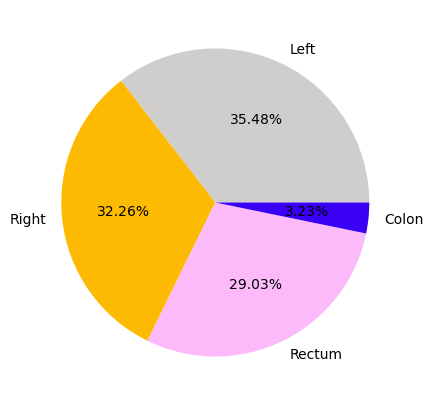

In [17]:
plt.figure(figsize=(5, 5))
plt.pie(
    df_patients["Location"].value_counts(),
    autopct = "%.2f%%",
    labels = ["Left", "Right","Rectum","Colon"],
    colors = ["#cfcecc", "#fcba03","#fcbafb","#3a00f5"]
)

In [18]:
df_proceed = df_patients

In [19]:
df_proceed

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,1,0,0,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,2,0,0,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,3,1,0,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,4,1,0,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,3,0,0,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,3,0,0,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,4,0,1,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,3,0,0,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,1,0,2,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


# Обработваме информацията

In [20]:
features = df_proceed._get_numeric_data().columns

In [21]:
features

Index(['Age (in years)', 'Dukes Stage', 'Gender', 'Location',
       'DFS (in months)', 'DFS event', 'Adj_Radio', 'Adj_Chem', '117_at',
       '1007_s_at',
       ...
       '1554911_at', '1554912_at', '1554914_at', '1554915_a_at',
       '1554916_a_at', '1554918_a_at', '1554919_s_at', '1554920_at',
       '213418_at', '1554921_a_at'],
      dtype='object', length=1943)

In [22]:
# Selecting the 'DFS event' column
dfs_event =  df_proceed['DFS event']

# Selecting the rest of the features
features =  df_proceed.drop('DFS event', axis=1)

# Calculating the correlation
correlations = features.corrwith(dfs_event)

# Separating positive and negative correlations
positive_correlations = correlations[correlations > 0]
negative_correlations = correlations[correlations < 0]

# Printing the positive correlations
print("Positive Correlations:")
print(positive_correlations)

# Printing the negative correlations
print("Negative Correlations:")
print(negative_correlations)

C:\Users\Borislav\AppData\Local\Temp\ipykernel_16032\1215509066.py:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = features.corrwith(dfs_event)


Positive Correlations:
Age (in years)    0.144688
Gender            0.129373
Location          0.107203
1007_s_at         0.175374
1438_at           0.011059
                    ...   
1554905_x_at      0.087249
1554910_at        0.040546
1554914_at        0.151663
1554915_a_at      0.131227
1554919_s_at      0.043922
Length: 904, dtype: float64
Negative Correlations:
Dukes Stage       -0.052400
DFS (in months)   -0.456020
Adj_Radio         -0.177496
Adj_Chem          -0.059427
117_at            -0.043004
                     ...   
1554916_a_at      -0.121907
1554918_a_at      -0.099247
1554920_at        -0.017765
213418_at         -0.062338
1554921_a_at      -0.076774
Length: 1038, dtype: float64


In [23]:
df_proceed = df_proceed.drop('ID_REF', axis = 1)

In [24]:
df_proceed.isnull().sum()


Age (in years)     0
Dukes Stage        0
Gender             0
Location           0
DFS (in months)    0
                  ..
1554918_a_at       0
1554919_s_at       0
1554920_at         0
213418_at          0
1554921_a_at       0
Length: 1943, dtype: int64

In [25]:
# Separate the features and the target variable
X = df_proceed.drop('DFS event', axis=1)
y = df_proceed['DFS event']

# Perform feature selection
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['DFS (in months)', '1431_at', '1552399_a_at', '1552491_at',
       '1552794_a_at', '1553027_a_at', '1553162_x_at', '1553423_a_at',
       '1553430_a_at', '1553505_at', '1553831_at', '1553858_at',
       '1553971_a_at', '1554198_at', '1554206_at', '1554225_a_at',
       '1554239_s_at', '1554554_at', '1554610_at', '1554800_at'],
      dtype='object')


In [26]:
for feature in selected_features:
    correlation = X[feature].corr(y)
    print(f"Correlation between 'DFS event' and {feature}: {correlation}")

Correlation between 'DFS event' and DFS (in months): -0.45602003242451095
Correlation between 'DFS event' and 1431_at: -0.4142157020553336
Correlation between 'DFS event' and 1552399_a_at: -0.34230702106711053
Correlation between 'DFS event' and 1552491_at: -0.33606839491273033
Correlation between 'DFS event' and 1552794_a_at: 0.34528876470320596
Correlation between 'DFS event' and 1553027_a_at: -0.32102640880943695
Correlation between 'DFS event' and 1553162_x_at: -0.4255742180333936
Correlation between 'DFS event' and 1553423_a_at: -0.37489522187054086
Correlation between 'DFS event' and 1553430_a_at: -0.34017599999413345
Correlation between 'DFS event' and 1553505_at: -0.35051605981439377
Correlation between 'DFS event' and 1553831_at: 0.32743268390598196
Correlation between 'DFS event' and 1553858_at: -0.31764942419948
Correlation between 'DFS event' and 1553971_a_at: 0.34747140733006326
Correlation between 'DFS event' and 1554198_at: 0.32734549610583236
Correlation between 'DFS ev

In [27]:
#Нека направим проверка, ръчно

In [28]:
df_proceed['DFS event'].corr(df_proceed['DFS (in months)'])


-0.45602003242451095

In [29]:
df_proceed['DFS event'].corr(df_proceed['Dukes Stage'])


-0.05239953581193532

In [30]:
df_proceed['DFS event'].corr(df_proceed['Location'])


0.10720335804304851

In [31]:
df_proceed['DFS event'].corr(df_proceed['Gender'])


0.12937330380511963

In [32]:
selected_features

Index(['DFS (in months)', '1431_at', '1552399_a_at', '1552491_at',
       '1552794_a_at', '1553027_a_at', '1553162_x_at', '1553423_a_at',
       '1553430_a_at', '1553505_at', '1553831_at', '1553858_at',
       '1553971_a_at', '1554198_at', '1554206_at', '1554225_a_at',
       '1554239_s_at', '1554554_at', '1554610_at', '1554800_at'],
      dtype='object')

In [33]:
columns_to_keep = ['DFS (in months)', '1431_at', '1552399_a_at', '1552491_at',
                   '1552794_a_at', '1553027_a_at', '1553162_x_at', '1553423_a_at',
                   '1553430_a_at', '1553505_at', '1553831_at', '1553858_at',
                   '1553971_a_at', '1554198_at', '1554206_at', '1554225_a_at',
                   '1554239_s_at', '1554554_at', '1554610_at', '1554800_at',
                   'DFS event']

In [34]:
#Създаваме нов dataframе в който ще оставим само колоните които сме избрали.
df_process = df_patients

In [35]:
df_process = df_process[columns_to_keep]

In [36]:
df_process

,DFS (in months),1431_at,1552399_a_at,1552491_at,1552794_a_at,1553027_a_at,1553162_x_at,1553423_a_at,1553430_a_at,1553505_at,...,1553858_at,1553971_a_at,1554198_at,1554206_at,1554225_a_at,1554239_s_at,1554554_at,1554610_at,1554800_at,DFS event
0,108.0,3.748200,3.042627,3.812209,2.741337,3.552917,6.731221,3.894457,3.222517,2.871826,...,6.443325,5.134617,3.692671,4.213587,3.224219,7.506913,3.651936,3.684323,3.198823,0.0
1,40.0,3.114340,2.920186,3.342797,2.994284,3.710844,5.627564,2.808655,3.088295,2.885667,...,6.257157,4.313987,3.711923,4.814876,3.084746,6.998196,3.645200,3.754968,3.125612,1.0
2,49.0,4.172270,3.177774,3.596201,2.902080,3.465597,5.734675,2.513046,2.897507,2.990387,...,6.442681,4.766469,3.713630,4.174208,3.130120,7.351509,3.601870,3.756188,3.472079,0.0
3,45.0,3.625413,3.051767,3.339952,2.986099,3.916702,6.318424,3.240439,3.324039,2.954959,...,6.183948,4.001048,3.730984,4.467068,2.831670,7.707753,3.949000,3.729778,3.396621,0.0
4,40.0,3.338311,3.106084,3.319644,2.985097,3.676973,6.044818,2.761253,3.339840,3.081601,...,6.061242,4.723205,3.549621,4.515138,2.889438,6.537042,3.647602,3.409464,3.238002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,22.0,3.161023,2.838518,3.393007,2.936901,3.753189,6.049581,2.832016,2.773151,2.898281,...,6.402312,5.181338,3.662906,5.347431,2.866089,6.335316,3.647823,3.455104,3.166249,1.0
58,64.0,3.392471,3.116523,3.452096,2.690481,3.912764,6.406071,3.015956,2.755239,3.257435,...,6.284390,4.645330,3.445777,4.754978,2.828722,6.834952,3.171138,3.466145,2.841265,0.0
59,25.0,3.381974,2.787146,3.551917,3.733580,3.398762,5.805457,3.005521,3.058420,2.887559,...,5.836867,4.809029,4.578244,4.279993,3.035153,6.410995,3.723168,3.846692,3.035153,1.0
60,58.0,3.222998,2.905462,3.559933,3.231933,3.408241,5.685862,2.759859,2.863591,3.037552,...,6.048780,5.114877,3.680958,4.380382,2.673385,7.238576,3.564267,3.840777,3.036096,1.0


In [37]:
correlation_matrix = df_process.corr()

In [38]:
print(correlation_matrix)

                 DFS (in months)   1431_at  1552399_a_at  1552491_at  \
DFS (in months)         1.000000  0.224082     -0.003752    0.252995   
1431_at                 0.224082  1.000000      0.432365    0.152859   
1552399_a_at           -0.003752  0.432365      1.000000    0.167967   
1552491_at              0.252995  0.152859      0.167967    1.000000   
1552794_a_at           -0.196009 -0.224596     -0.098983   -0.233134   
1553027_a_at            0.307487  0.093875     -0.127342   -0.061259   
1553162_x_at            0.394904  0.134383      0.109040    0.117904   
1553423_a_at            0.299899  0.029771      0.158126    0.026966   
1553430_a_at            0.032979  0.096201     -0.006260    0.186578   
1553505_at              0.157013  0.217776      0.270308   -0.029324   
1553831_at             -0.234796  0.003433      0.047105   -0.134765   
1553858_at              0.121067  0.349104      0.334064    0.128034   
1553971_a_at           -0.125118  0.063658     -0.050372    0.06

<Axes: >

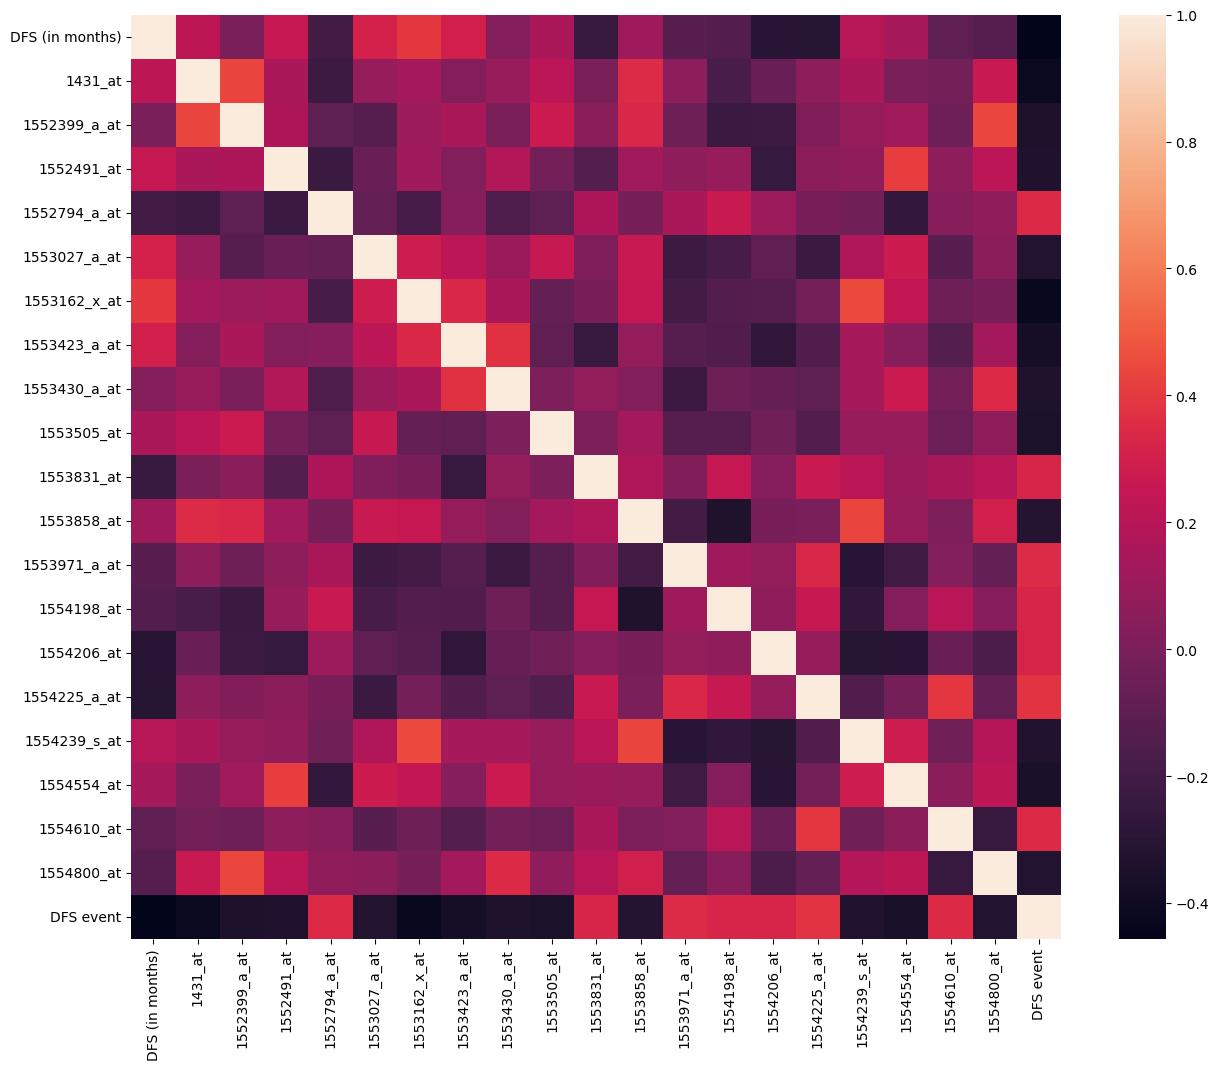

In [39]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix)

## Decision Tree

In [40]:
X = df_process.drop('DFS event', axis=1)

In [41]:
y = df_process['DFS event']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=24)

In [43]:
# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [45]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
dt_tn, dt_fp, dt_fn, dt_tp = confusion_matrix(y_test, y_pred).ravel()

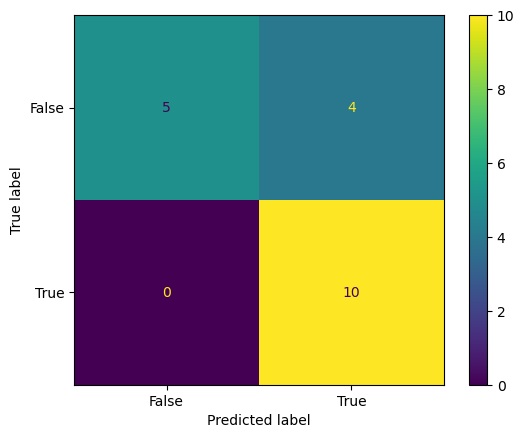

In [46]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [47]:
total_predictions = len(y_pred)
print("True Positive results: ", dt_tp,"from",total_predictions )
print("True Negative results: ", dt_tn,"from",total_predictions )
print("False Positive results: ", dt_fp,"from",total_predictions)
print("False Negative results: ", dt_fn,"from",total_predictions)

True Positive results:  10 from 19
True Negative results:  5 from 19
False Positive results:  4 from 19
False Negative results:  0 from 19


In [48]:
decision_accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = decision_accuracy * 100
accuracy_formatted = "{:.2f}%".format(accuracy_percentage)
print("Decision Classifier Accuracy:", accuracy_formatted)

Decision Classifier Accuracy: 78.95%


# Logistic Regression

In [49]:
# Separate the features and the target variable
X = df_proceed.drop('DFS event', axis=1)
y = df_proceed['DFS event']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# Train the Logistic Regression classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [50]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
lr_tn, lr_fp, lr_fn, lr_tp = confusion_matrix(y_test, y_pred).ravel()

In [51]:
logistic_accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = logistic_accuracy * 100
accuracy_formatted = "{:.2f}%".format(accuracy_percentage)
print("Logistic Regression Classifier Accuracy:", accuracy_formatted)

Logistic Regression Classifier Accuracy: 89.47%


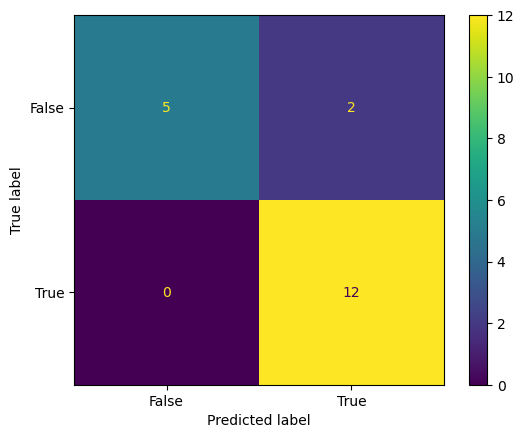

In [52]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [53]:
total_predictions = len(y_pred)
print("True Positive results: ", lr_tp,"from",total_predictions )
print("True Negative results: ", lr_tn,"from",total_predictions )
print("False Positive results: ", lr_fp,"from",total_predictions)
print("False Negative results: ", lr_fn,"from",total_predictions)

True Positive results:  12 from 19
True Negative results:  5 from 19
False Positive results:  2 from 19
False Negative results:  0 from 19


# Изводи от съпоставката

<BarContainer object of 2 artists>

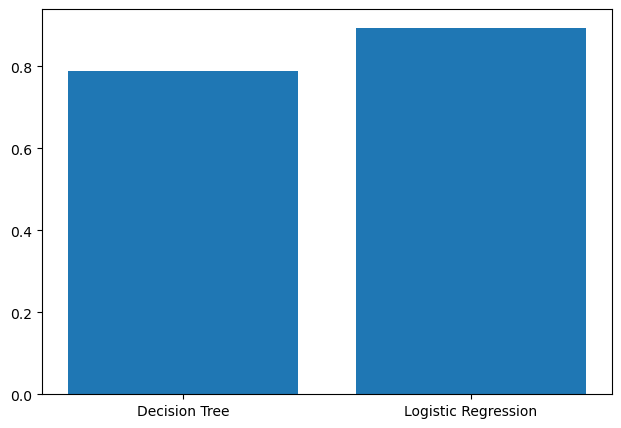

In [54]:
#Visualizing Accuracy
names = ['Decision Tree','Logistic Regression']
values = [decision_accuracy,logistic_accuracy]
f = plt.figure(figsize=(25,5),num=10)
plt.subplot(131)
plt.bar(names,values)

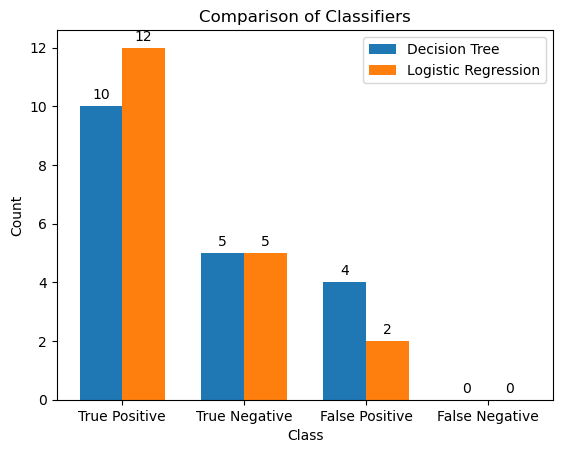

In [55]:
# Data for the bar chart
classifiers = ['Decision Tree', 'Logistic Regression']
labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']
dt_values = [dt_tp, dt_tn, dt_fp, dt_fn]
lr_values = [lr_tp, lr_tn, lr_fp, lr_fn]

x = np.arange(len(labels))
width = 0.35

# Plotting the bar charts
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dt_values, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, lr_values, width, label='Logistic Regression')

ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Comparison of Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label position
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()